## Via skimage usage

In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure
from skimage.exposure import match_histograms
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

## First display the 3 images

In [39]:
image1 = imread('landscape.jpg') #, as_gray=True)
#image1_Gray = rgb2gray(image1)
image1_Gray = imread('landscape.jpg', as_gray=True)

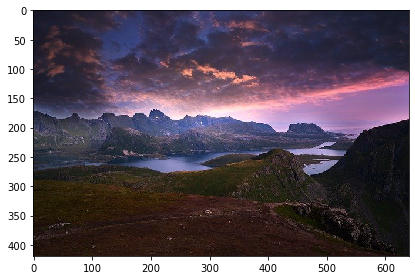

In [40]:
imshow(image1)

### Display histogram for image 1 (grayscale)

In [41]:
image1_Gray.shape

(419, 640)

In [42]:
image1_Gray

array([[0.09889451, 0.09497294, 0.09497294, ..., 0.10034588, 0.10034588,
        0.10034588],
       [0.09889451, 0.09497294, 0.09497294, ..., 0.10034588, 0.10034588,
        0.10034588],
       [0.09889451, 0.09497294, 0.09497294, ..., 0.10034588, 0.10034588,
        0.10034588],
       ...,
       [0.08895216, 0.09679529, 0.08895216, ..., 0.05657647, 0.05825804,
        0.0627451 ],
       [0.09287373, 0.09679529, 0.09287373, ..., 0.05657647, 0.05825804,
        0.0627451 ],
       [0.09287373, 0.10071686, 0.09679529, ..., 0.05657647, 0.05825804,
        0.0627451 ]])

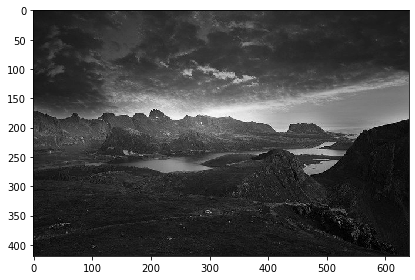

In [43]:
imshow(image1_Gray)

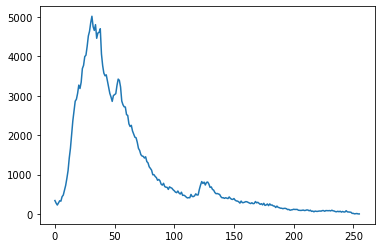

In [44]:
def histGrayScale(img):
    hist = exposure.histogram(img)
    plt.plot(hist[0])
    plt.show()
histGrayScale(image1_Gray)

### Display histogram for image 1 (colored)

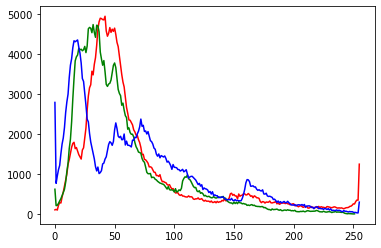

In [45]:
def histColor(img):
    plt.plot(exposure.histogram(img[...,0])[0], color='red')
    plt.plot(exposure.histogram(img[...,1])[0], color='green')
    plt.plot(exposure.histogram(img[...,2])[0], color='blue')
    plt.show()
histColor(image1)

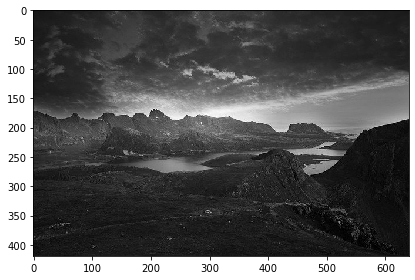

In [51]:
import numpy as np
im = np.where(image1_Gray>250/256, 1, image1_Gray)
imshow(im)

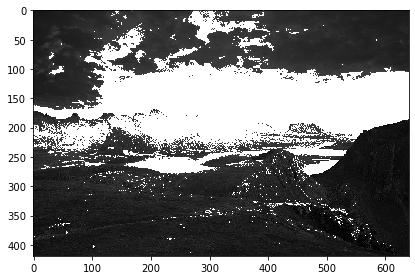

In [64]:
import numpy as np
im = np.where(image1_Gray>=120/256, 1, image1_Gray)
imshow(im)

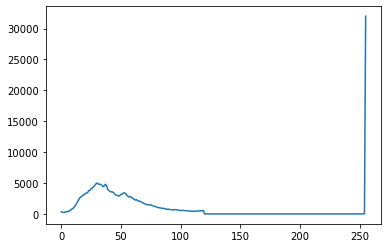

In [61]:
histGrayScale(im)

## Threshold based on mean

In [62]:
from skimage.filters import threshold_mean

In [65]:
thresh = threshold_mean(image1) 
# return Upper threshold value. All pixels with an intensity higher than this value are assumed to be foreground.
print(thresh)

64.79863638623708


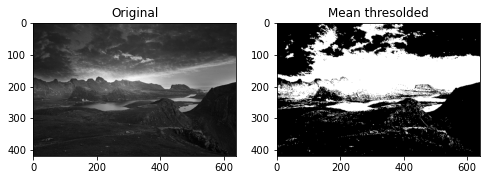

In [66]:
def thresholdMeanDisplay(image):
    thresh = threshold_mean(image)
    binary = image > thresh
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Mean thresolded')
    #img_hist, bins = exposure.histogram(binary)
    #ax[2].plot(bins, img_hist / img_hist.max())
    
thresholdMeanDisplay(image1_Gray)

## Otsu Threshold

from skimage.filters import threshold_otsu, threshold_localCompute a threshold mask image based on local pixel neighborhood.

In [67]:
from skimage.filters import threshold_otsu

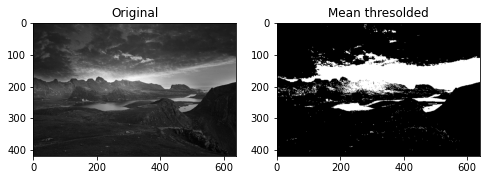

In [68]:
def thresholdOtsuDisplay(image):
    thresh = threshold_otsu(image)
    binary = image > thresh
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Mean thresolded')
    
thresholdOtsuDisplay(image1_Gray)